<a href="https://colab.research.google.com/github/Hidenori24/Hobby/blob/master/Signate_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#参考資料たち
## ・諸橋さんデータ
  https://github.com/sota1111/DL_Zero
## ・Signate Beginner コンペ
  https://signate.jp/competitions/746/data
## ・Wandb Home
  https://wandb.ai/quickstart/tensorflow

In [24]:
!pip install tensorflow
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import wandb
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

wandb.init(
    project="signate-begi-30",
    config = {
      "learning_rate": 0.001,
      "epochs": 100,
      "batch_size": 128
    }
    )
path = "/content/drive/MyDrive/ML/Signate_30/train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                     blueFirstBlood  blueKills  blueDeaths  blueAssists  \
blueFirstBlood             1.000000   0.283559   -0.325833     0.241781   
blueKills                  0.283559   1.000000   -0.079929     0.710046   
blueDeaths                -0.325833  -0.079929    1.000000    -0.060368   
blueAssists                0.241781   0.710046   -0.060368     1.000000   
blueEliteMonsters          0.213862   0.246184   -0.223138     0.213466   
blueDragons                0.155051   0.196728   -0.180798     0.176668   
blueTotalGold             -0.111157   0.099387    0.060901     0.108863   
blueTotalExperience        0.033651   0.309264   -0.051879     0.301567   
blueWins                   0.226536   0.337541   -0.237224     0.311647   

                     blueEliteMonsters  blueDragons  blueTotalGold  \
blueFirstBlood                0.213862     0.155051      -0.111157   
blueKills                     0.246184     0.196728       0.099387   
blueDeaths                   -0.223138 

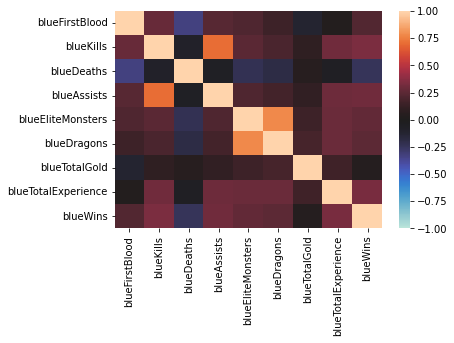

In [26]:
df=pd.read_csv(path,index_col=0)
corr = df.corr()
print(corr) #相関係数
sns.heatmap(corr, vmax=1, vmin=-1, center=0)

In [27]:
y = df['blueWins']
x = df.drop("blueWins",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

#モデル定義
model = Sequential() #Sequentailオブジェクトを生成

model.add(Dense(input_dim = len(x_train.columns), units = 8, activation = 'relu')) #1層目、活性化関数はReLU関数

model.add(Dense(units = 1,activation = 'sigmoid')) #2層目(出力層)、活性化関数はsigmoid関数

#コンパイル
model.compile(optimizer = SGD(learning_rate = 0.5), loss = 'binary_crossentropy')

#モデルのサマリ(全体像)を表示
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


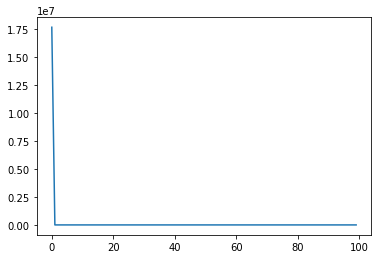

In [46]:
history = model.fit(
    x_train,                #訓練データ
    y_train,                #ラベル
    epochs = 100,     #エポック数
    batch_size = 8,    #ミニバッチのサイズを指定
    verbose = 0
)

#描画
plt.plot(history.history['loss']) #fit()メソッドの出力に保存されている損失を描画
plt.show()